# PCA Report
### Data Exploration
The first step in any data analysis is to explore the dataset and understand its characteristics. This dataset contains statistics on arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. It also contains the percentage of the population living in urban areas.

In [97]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder

#read in dataset
df = pd.read_csv('UsArrests.csv')
df.head()


,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [98]:
# confirm the different types of data
df.dtypes

City         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [99]:
# Remove the non-numeric column
df = df.drop(columns=['City'])

# Convert the DataFrame to float
df = df.astype('float64')

The dataset has 50 rows (one for each US state) and 5 columns (City, Murder, Assault, UrbanPop and Rape)

### Data Preprocessing

Before analysing any data it needs to be processed.  I  will start with standardising the data because each variable is measured on a different scale.

In [100]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)
print(df_scaled.head())

     Murder   Assault  UrbanPop      Rape
0  1.255179  0.790787 -0.526195 -0.003451
1  0.513019  1.118060 -1.224067  2.509424
2  0.072361  1.493817  1.009122  1.053466
3  0.234708  0.233212 -1.084492 -0.186794
4  0.281093  1.275635  1.776781  2.088814


Each variable now has a mean of zero and a standard deviation of 1.

### Principal Component Anaylsis (PCA)
Now the data has been preprocessed, I can perform the PCA. PCA is a technique used to reduce the dimensionality of high-dimensional datasets by transforming them into a lower-dimensional space while retaining most of the variance in the data.

In [101]:


pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, index=df.index, columns=['PC1', 'PC2'])
print(df_pca.head())


        PC1       PC2
0  0.985566  1.133392
1  1.950138  1.073213
2  1.763164 -0.745957
3 -0.141420  1.119797
4  2.523980 -1.542934


The dataset has been reduced into 2 components (PC1 and PC2). These are linear combinations of the variables.
Below I will visualise the data onto this 2D space.

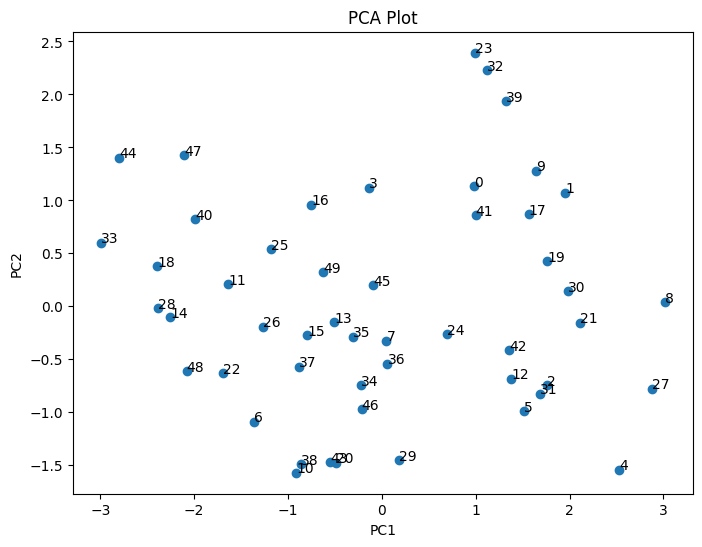

In [102]:


plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
for i, state in enumerate(df_pca.index):
    plt.annotate(state, (df_pca.iloc[i, 0], df_pca.iloc[i, 1]))
plt.show()



The data in this plot is clusters into 3 groups: 
States with high assault and murder rates (Alaska, Arizona, Florida, Louisiana)
States with average assault and murder rates but high rape rates (Delaware, Michigan)
States with low crime rates (Maine, Minnesota, Vermont)

The 2 principal components can be interpreted as follows:

PC1: This component is strongly correlated with all the variables in the dataset, but most strongly with assault, murder, and rape. States with high values of PC1 have high crime rates.

PC2: This component is primarily correlated with the percentage of the population living in urban areas. States with high values of PC2 have a higher percentage of their population living in urban areas.


## Loadings

Calculate the loadings of each variable on the two principal components:

In [104]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df.columns)
print(loadings)


               PC1       PC2
Murder    0.535899  0.418181
Assault   0.583184  0.187986
UrbanPop  0.278191 -0.872806
Rape      0.543432 -0.167319


PC1 is strongly correlated with all the variables, but most strongly with assault, murder, and rape. This suggests that states with high values of PC1 have high crime rates.
PC2 is primarily correlated with the percentage of the population living in urban areas. This suggests that states with high values of PC2 have a higher percentage of their population living in urban areas.


 ## Clustering Analysis
### K-Means Clustering

In [105]:


kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)


c:\Users\Carol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Now the K-means model is fit I can use it to predict cluster labels for each state below.

In [107]:
df_clusters = df.copy()
df_clusters['Cluster'] = kmeans.labels_
print(df_clusters)


    Murder  Assault  UrbanPop  Rape  Cluster
0     13.2    236.0      58.0  21.2        1
1     10.0    263.0      48.0  44.5        1
2      8.1    294.0      80.0  31.0        1
3      8.8    190.0      50.0  19.5        0
4      9.0    276.0      91.0  40.6        1
5      7.9    204.0      78.0  38.7        1
6      3.3    110.0      77.0  11.1        2
7      5.9    238.0      72.0  15.8        2
8     15.4    335.0      80.0  31.9        1
9     17.4    211.0      60.0  25.8        1
10     5.3     46.0      83.0  20.2        2
11     2.6    120.0      54.0  14.2        0
12    10.4    249.0      83.0  24.0        1
13     7.2    113.0      65.0  21.0        2
14     2.2     56.0      57.0  11.3        0
15     6.0    115.0      66.0  18.0        2
16     9.7    109.0      52.0  16.3        0
17    15.4    249.0      66.0  22.2        1
18     2.1     83.0      51.0   7.8        0
19    11.3    300.0      67.0  27.8        1
20     4.4    149.0      85.0  16.3        2
21    12.1